In [33]:
# !/usr/bin/env python
# -*- coding: utf-8 -*-
#
# Author: David Hokken
# Date:   1/7/2021
#


###############################
########### MODULES ########### 
###############################


import itertools
import numpy as np
import matplotlib.pyplot as plt

dr = '/path/to/directory' # path to wherever you want to save output


###############################
########## FUNCTIONS ##########
###############################


######################
#### Basic things ####
######################

R.<x> = PolynomialRing(QQ)

def F(n):
    '''Returns a list with all Littlewood polynomials of degree n'''   
    return [x^n+x^(n-1)+R(v) for v in (itertools.product((1,-1),repeat=n-1))]

def get_ir(lst):
    '''Returns the irreducibles from a list of polynomials'''
    return [f for f in lst if f.is_irreducible()]

def get_sq(lst):
    '''Returns the polynomials with square discriminant from a 
    list of polynomials'''
    return [f for f in lst if f.discriminant().is_square()]

def get_sqir(lst):
    '''Returns the irreducibles with square discriminant from a 
    list of polynomials.
    NOTE: get_ir(get_sq(...)) is much faster than get_sq(get_ir(...))'''
    return get_ir(get_sq(lst))


############################
######## reciprocals #######
############################

def is_reciprocal(f):
    '''Checks if a given polynomial is reciprocal'''
    if len(f.list()) % 2 == 0:
        return 'This is not a reciprocal polynomial'
    else:
        return f.list() == list(reversed(f.list()))
    
def is_skew(f):
    '''Check if a given polynomial is skewreciprocal'''
    deg = f.degree()
    T = var('T')
    if deg % 2 != 0:
        return 'This is not a skewreciprocal polynomial'
    elif deg % 4 == 2:
        skew_f = -T^deg*f(-1/T)
    elif deg % 4 == 0:
        skew_f = T^deg*f(-1/T)
        
    if skew_f == f(T):
        return True
    else:
        return False

def f_rev(f):
    '''Given a polynomial f, returns the reversal f_rev of f'''
    T = var('T')
    deg = f.degree()
    v = ((T^deg*f(1/T)).expand()).list()
    return R(v)

def f_srev(f):
    '''Given a polynomial f, returns the skewreversal f_srev of f'''
    T = var('T')
    deg = f.degree()
    v = ((-1)^(deg*(deg-1)/2)*(T^deg*f(-1/T)).expand()).list()
    return R(v)
    
def f_Q(f):
    '''Given a polynomial f of degree n in the variable y=x+x^{-1},
    returns the reciprocal polynomial f^Q of degree 2n in the variable x 
    such that f^Q(x) = x^n f_RQ(x+x^{-1})'''
    T = var('T')
    degree = f.degree()
    v = ((T^degree*f(T+1/T)).expand()).list()
    return R(v)
    
def f_S(f):    
    '''Given a polynomial f of degree n in the variable y=x+x^{-1},
    returns the skewreciprocal polynomial f^S of degree 2n in the variable x 
    such that f^S(x) = x^n f_RS(x-x^{-1})'''
    T = var('T')
    deg = f.degree()
    v = ((T^deg*f(T-1/T)).expand()).list()
    return R(v)
    
def Rec(n):
    '''Returns a list of all reciprocal Littlewood polynomials of degree 2n'''
    L = list(itertools.product((1,-1),repeat=n-1))
    Rlist = []
    for i in range(len(L)):
        L[i] = list(L[i])
        L[i].extend([1,1])
        L[i] = tuple(L[i])
        Rlist.append(list(reversed(L[i]))[:-1])
        Rlist[i].extend(list(L[i]))
    Rlist = [R(v) for v in Rlist]
    return Rlist

def SRec(n):
    '''Returns a list of all skewreciprocal Littlewood polynomials of degree 2n'''
    L = list(itertools.product((1,-1),repeat=n-1))
    SRlist = []
    for i in range(len(L)):
        lst = list(L[i])
        M = lst[::-1]
        M.extend([1,1])
        N = [-1*x for x in M[1::2]]
        M = M[::2]
        M = [x for y in zip(M, N) for x in y]
        if n % 2 == 0:
            M.append(1)
        lst.extend(M[1:])
        lst[0:0]=[1,1]
        lst = tuple(reversed(lst))
        SRlist.append(lst)
    SRlist = [R(v) for v in SRlist]
    return SRlist

def t(l, k):
    '''helper function for f_RQ and f_RS (see below)'''
    return k/(k-l) * binomial(k-l, l)

def f_RQ(f):
    '''Given a reciprocal polynomial f of degree 2n in the variable x, 
    returns the trace polynomial f_R of degree n in the  variable y = x+x^{-1} 
    such that f(x) = x^n f_R(y)'''
    if not is_reciprocal(f):
        return "This is not a reciprocal"
    else: 
        flist = f.list()[:(len(f.list())+1)/2]
        deg = len(flist)-1
        alist = flist[:]
        for i in range(deg+1):
            for l in range(1, int(math.floor((i)/2)+1)):
                alist[i] += flist[i-2*l]*(-1)**l*t(l, deg-i+2*l)
        return S(list(reversed(alist)))

def f_RS(f):
    '''Given a skewreciprocal polynomial f of degree 2n in the variable x, 
    returns the trace polynomial f_RS of degree n in the  variable y = x-x^{-1} 
    such that f(x) = x^n f_RS(y)'''
    if not is_skew(f):
        return "This is not a skewreciprocal"
    else: 
        flist = f.list()[(len(f.list())-1)/2:]
        deg = len(flist)-1
        alist = flist[:]
        for i in range(deg+1):
            for l in range(1, 1+int(math.floor((deg-i)/2))):
                alist[i] += flist[i+2*l]*t(l, i+2*l)
        g = S(list(alist))
        return g


############################
######### pictures #########
############################

def picture(n):
    '''Returns a picture of all roots of all Littlewood polynomials of degree < n'''
    X = []
    Y = []
    for i in range(1, n):
        for f in F(n):
            roots = f.roots(ring=CDF)
            for r in roots:
                X.append(r[0].real())
                Y.append(r[0].imag())
                X.append(-(r[0].real()))
                Y.append((r[0].imag()))

    fig = plt.figure(figsize=(21, 13))
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X, Y, s=0.02, color='red')
    plt.axis('equal')
    plt.axis('off')
    plt.show()

In [ ]:
n=25
k=11

head = [x^n+x^(n-1)+x^(k)*R(v) for v in (itertools.product((1,-1),repeat=n-k-1))]
headlen = 2^(n-k-1)
tail = [R(v) for v in (itertools.product((1,-1),repeat=k))]

with open(dr+'SI/SI_25.txt', 'w+') as g:
    for i in range(headlen):
        p = head[i]
        polys = [p+f for f in tail]
        L = get_sqir(polys)
        if len(L) != 0:
            g.write(str(L)+"\n")
        if i % 10000 == 0:
            print(i)

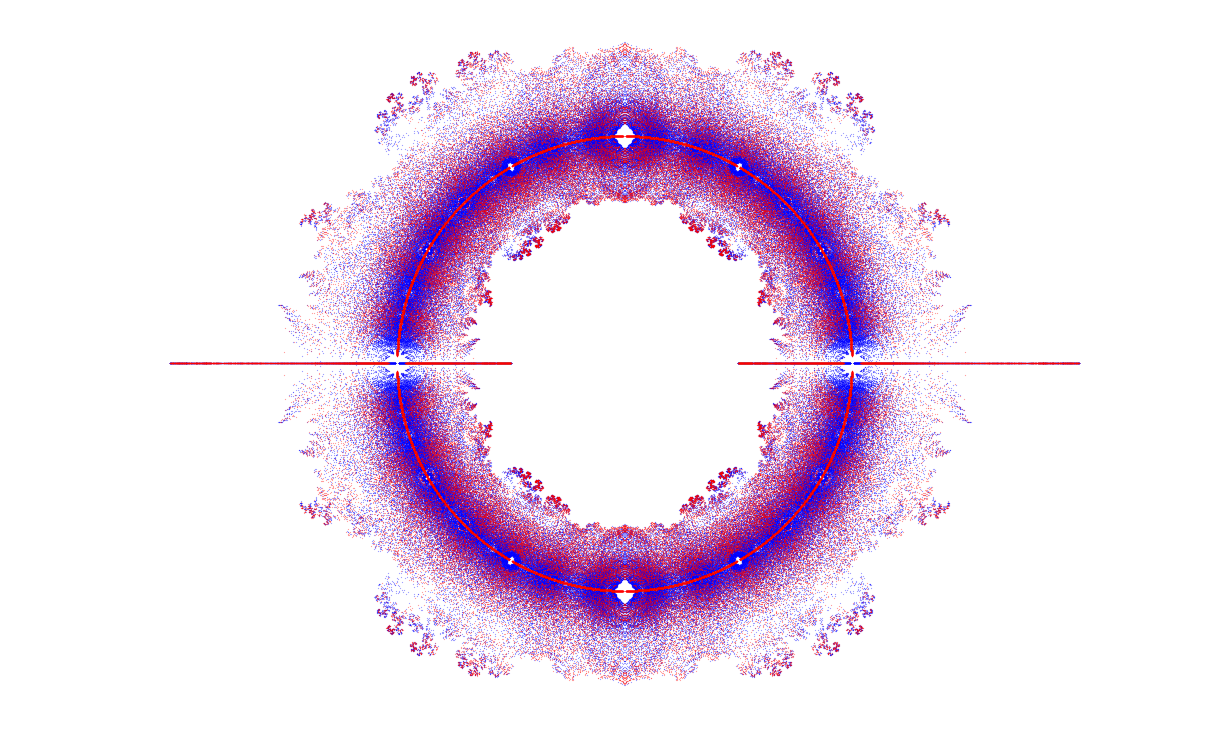

In [34]:
def get_polys_from_file(path):
    with open(path, 'r') as f: 
        g = f.readlines()
        polys = []
        for i in range(len(g)):
            pol = R(g[i])
            polys.append(pol)
    return polys

Xrec = []
Yrec = []
Xskew = []
Yskew = []

for n in [6, 8, 14, 16, 22, 24, 30]:
    polys = get_polys_from_file(dr+'sqn/sq_{}.txt'.format(n))
    for f in polys:
        if is_reciprocal(f):
            roots = f.roots(ring=CDF)
            for r in roots:
                Xrec.append(r[0].real())
                Yrec.append(r[0].imag())
                Xrec.append(-(r[0].real()))
                Yrec.append(r[0].imag())
        else:
            roots = f.roots(ring=CDF)
            for r in roots:
                Xskew.append(r[0].real())
                Yskew.append(r[0].imag())
                Xskew.append(-(r[0].real()))
                Yskew.append(r[0].imag())

                
fig = plt.figure(figsize=(21, 13))
ax = fig.add_subplot(1,1,1)
plt.scatter(Xskew, Yskew, s=0.02, color='blue')
plt.scatter(Xrec, Yrec, s=0.02, color='red')
plt.axis('equal')
plt.axis('off')
plt.show()
# fig.savefig("littleroot_skew_rec_2.png", bbox_inches='tight', pad_inches=0, transparent=False, dpi=220)

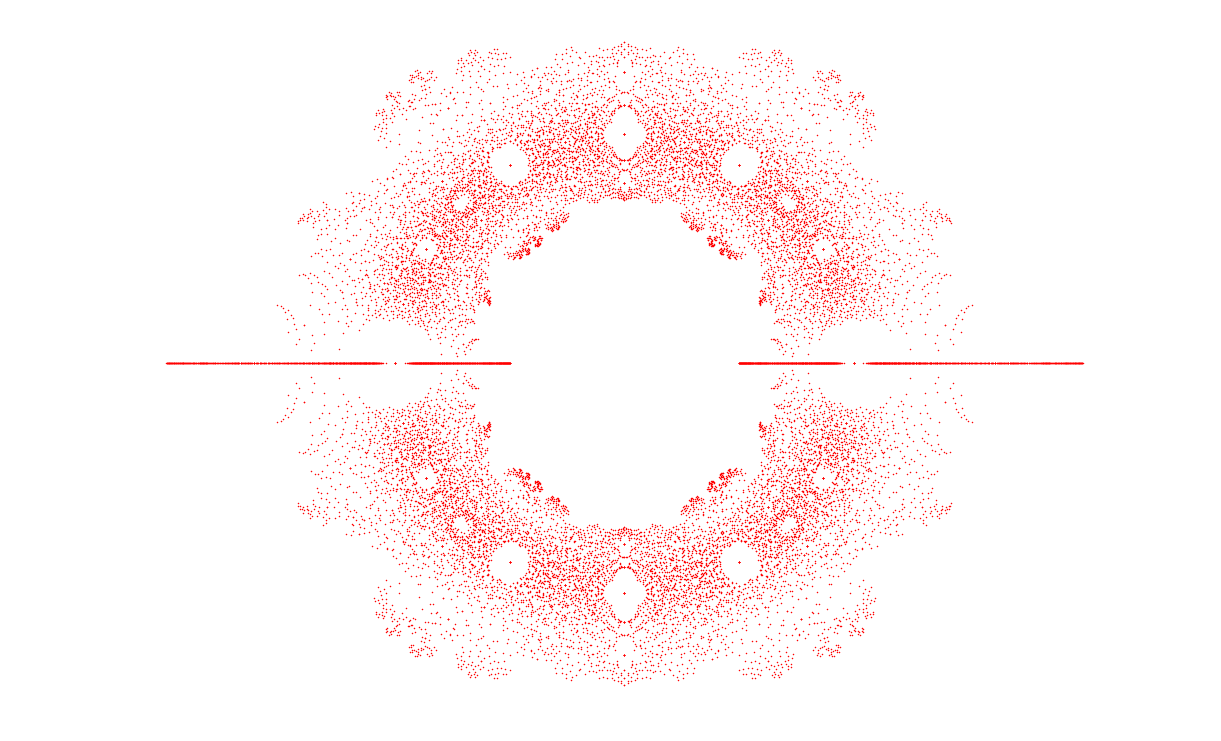

In [13]:
picture(11)